# Introduction
We are applying XGBoost model to airline data for classification and will analyze feature importance. We will train, tune, and evaluate an XGBoost model.

# Import Packages
We will import pandas, numpy, matplotlib, scikit-learn model sel;ection and metrics, and xgboost for data preparation and model building.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from xgboost import plot_importance

# Loading the Dataset 
To formulate our model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`.

In [2]:
airline_data = pd.read_csv('Invistico_Airline.csv', on_bad_lines='skip')

we need to examine the first 10 rows of data to familiarize  with the dataset.

In [3]:
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


We have 21 features and `satisfaction` is the target variable

In [4]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

#### Total rows are 129880. `Arrival Delay in Mintues` has some missing values but we will ignore these missing values

# Display the data type for each column
Next, we observe the types of data present within this dataset.

In [5]:
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

# Model Preparation
We have four non-numerical (categorical) variables i.e. `satisfaction`, `Customer Type`, `Type of Travel` and  `Class`. <br>
So we will convert them to numeric data.

In [6]:
airline_data_dummies = pd.get_dummies(data = airline_data,columns=['satisfaction','Customer Type','Type of Travel','Class'])
airline_data_dummies

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,False,True,True,False,False,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,False,True,True,False,False,True,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,False,True,True,False,False,True,False,True,False
3,60,623,0,0,0,3,3,4,3,1,...,0.0,False,True,True,False,False,True,False,True,False
4,70,354,0,0,0,3,4,3,4,2,...,0.0,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,0.0,False,True,False,True,False,True,False,True,False
129876,63,2087,2,3,2,4,2,1,1,3,...,172.0,True,False,False,True,False,True,True,False,False
129877,69,2320,3,0,3,3,3,2,2,4,...,163.0,True,False,False,True,False,True,False,True,False
129878,66,2450,3,2,3,2,3,2,2,3,...,205.0,True,False,False,True,False,True,False,True,False


## Encoded Categorical Features for Machine Learning
The resulting dataset `airline_data_dummies` contains exclusively numeric features ready for model training.

## Isolating target and predictor variables

Now we will separately define the target variable `satisfaction` and the features using `pandas` function

In [7]:
y = airline_data_dummies['satisfaction_satisfied']

In [8]:
X = airline_data_dummies.drop(columns=['satisfaction_satisfied','satisfaction_dissatisfied'])

## Dividing the Data
We will divide the data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows us to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model Building

## Instantiating XGBClassifer
We are creating the XGB Classifier model and defining its objective.

In [10]:
xgb = XGBClassifier(objective='binary:logistic',random_state = 0)

## Defining the parameters for hyperparameter tuning
To identify suitable parameters for  `xgboost` model, first we will define the parameters for hyperparameter tuning. Specifically, we will tune `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and `colsample_bytree`.

In [11]:
cv_params = {
    'max_depth': [4],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [5,10],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

## Define how the models will be evaluated
We will use following four metrics to evalute the model.

In [15]:
scoring = ['precision','accuracy','recall','f1']

## Constructing the GridSearch cross-validation
Now we will construct the GridSearch cross-validation using the model, parameters, and scoring metrics already defined. Additionally, we will define the number of folds and specify which metric from above will guide the refit strategy.

In [16]:
xgb_cv = GridSearchCV(estimator=xgb,param_grid=cv_params,scoring=scoring,refit='f1',cv=5)

## Fitting the Model
We will fit our GridSearch model having XGBoost estimator to the training data.

In [ ]:
xgb_cv.fit(X_train,y_train)

## Retrieving Optimal Hyperparameters from Cross-Validation
The folloowing code extracts the combination of hyperparameters that achieved the highest performance during GridSearchCV optimization

In [18]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 10,
 'subsample': 0.7}

# Results and Evaluation

## Getting Predictions for Test Data
Now we are getting predictions on unseen test data.

In [19]:
y_pred = xgb_cv.predict(X_test)

## Assessing the Model
Now we will assss our model using the metrics from scikit-learn.

In [20]:
ac = accuracy_score(y_test,y_pred)
print("accuracy score: ",ac)

accuracy score:  0.8958423159839852


In [21]:
pc = precision_score(y_test,y_pred)
print("precision score: ",pc)

precision score:  0.9002877379371403


In [22]:
rc = recall_score(y_test,y_pred)
print("recall score: ",rc)

recall score:  0.911484593837535


In [23]:
f1 = recall_score(y_test,y_pred)
print("f1 score: ",f1)

f1 score:  0.911484593837535


# Analysis
The model shows a `precision` score of 0.90, suggesting the model is very good at predicting true positives. This means the model correctly predicts whether the airline passenger will be satisfied. The `recall` score of 0.91 is also very good. This means that the model does a good job of correctly identifying dissatisfied passengers within the dataset. `f1` score shows combined assessment of how well this model delivers predictions. In this case, the `f1` score is 0.911, which suggests very strong predictive power in this model.

# Confusion Matrix and Important Features
Confusion matrix shows model's true and false positives and true and false negatives. It helps to create a visual representation.

In [24]:
cm = confusion_matrix(y_test,y_pred)

In [25]:
disp = ConfusionMatrixDisplay(cm,display_labels=xgb_cv.classes_)

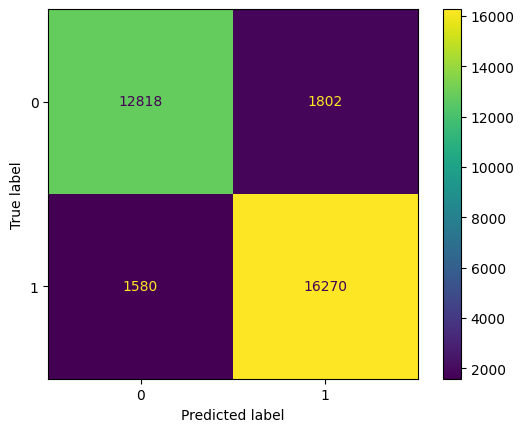

In [26]:
disp.plot()

It is obvios that true positive and true negative outshine false positive and false negative

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. 

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

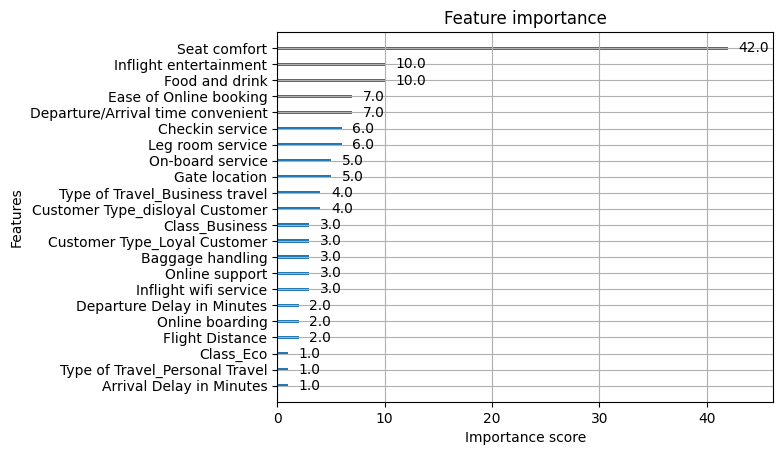

In [27]:
plot_importance(xgb_cv.best_estimator_)

`Seat comfort` is rated as most important in the model.